# Reding Data without Pandas

In [2]:
import csv

In [3]:
messages = []
with open('Advertising.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=('X1','TV', 'Radio', 'Newspaper', 'Sales'))
    for row in reader:
        messages.append(row)

In [4]:
messages

[{'X1': 'X1',
  'TV': 'TV',
  'Radio': 'Radio',
  'Newspaper': 'Newspaper',
  'Sales': 'Sales'},
 {'X1': '1',
  'TV': '230.1',
  'Radio': '37.8',
  'Newspaper': '69.2',
  'Sales': '22.1'},
 {'X1': '2',
  'TV': '44.5',
  'Radio': '39.3',
  'Newspaper': '45.1',
  'Sales': '10.4'},
 {'X1': '3',
  'TV': '17.2',
  'Radio': '45.9',
  'Newspaper': '69.3',
  'Sales': '9.3'},
 {'X1': '4',
  'TV': '151.5',
  'Radio': '41.3',
  'Newspaper': '58.5',
  'Sales': '18.5'},
 {'X1': '5',
  'TV': '180.8',
  'Radio': '10.8',
  'Newspaper': '58.4',
  'Sales': '12.9'},
 {'X1': '6', 'TV': '8.7', 'Radio': '48.9', 'Newspaper': '75', 'Sales': '7.2'},
 {'X1': '7',
  'TV': '57.5',
  'Radio': '32.8',
  'Newspaper': '23.5',
  'Sales': '11.8'},
 {'X1': '8',
  'TV': '120.2',
  'Radio': '19.6',
  'Newspaper': '11.6',
  'Sales': '13.2'},
 {'X1': '9', 'TV': '8.6', 'Radio': '2.1', 'Newspaper': '1', 'Sales': '4.8'},
 {'X1': '10',
  'TV': '199.8',
  'Radio': '2.6',
  'Newspaper': '21.2',
  'Sales': '10.6'},
 {'X1': '11',
 

# Pandas makes the life easier

In [5]:
# conventional way to import pandas
import pandas as pd

In [6]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
X1,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.Newspaper

X1
1      69.2
2      45.1
3      69.3
4      58.5
5      58.4
       ... 
196    13.8
197     8.1
198     6.4
199    66.2
200     8.7
Name: Newspaper, Length: 200, dtype: float64

In [8]:
#?pd.read_csv 

Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [9]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
X1,,,,
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [10]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

## Can we apply linear Regression to it

5 conditoions needs to be satisfied for the Linear Regression to be applied

1> The target variable should be continous data.
2> Linear relationaship between the Independent and dependent variable.
3> The outlier condition
4> independent of errors
5> homoscedasticity
6> Normality of error distribution.




There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

(i) linearity and additivity of the relationship between dependent and independent variables:

    (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

    (b) The slope of that line does not depend on the values of the other variables.

    (c)  The effects of different independent variables on the expected value of the dependent variable are additive.

(ii) statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

(iii) homoscedasticity (constant variance) of the errors

    (a) versus time (in the case of time series data)

    (b) versus the predictions

    (c) versus any independent variable

(iv) normality of the error distribution.

### Condition:1 Is my target variable continous data? 

In [12]:
#!pip install pandas_profiling
import pandas_profiling as pp
pp.ProfileReport(data)

In [13]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
data.Sales

X1
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

### condition:2 : Is there a correlation between IV & DV

In [16]:
corrData = data.corr()

In [17]:
corrData

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [18]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

<AxesSubplot:>

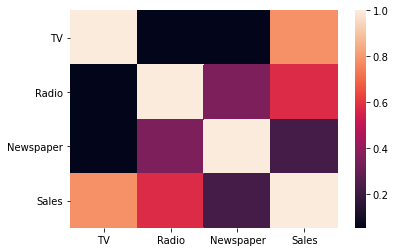

In [19]:
sns.heatmap(corrData)

## Lets see it via graph

In [20]:
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import seaborn as sns

<AxesSubplot:>

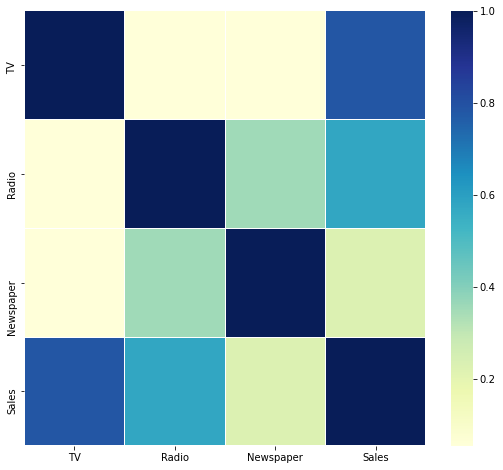

In [21]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrData, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

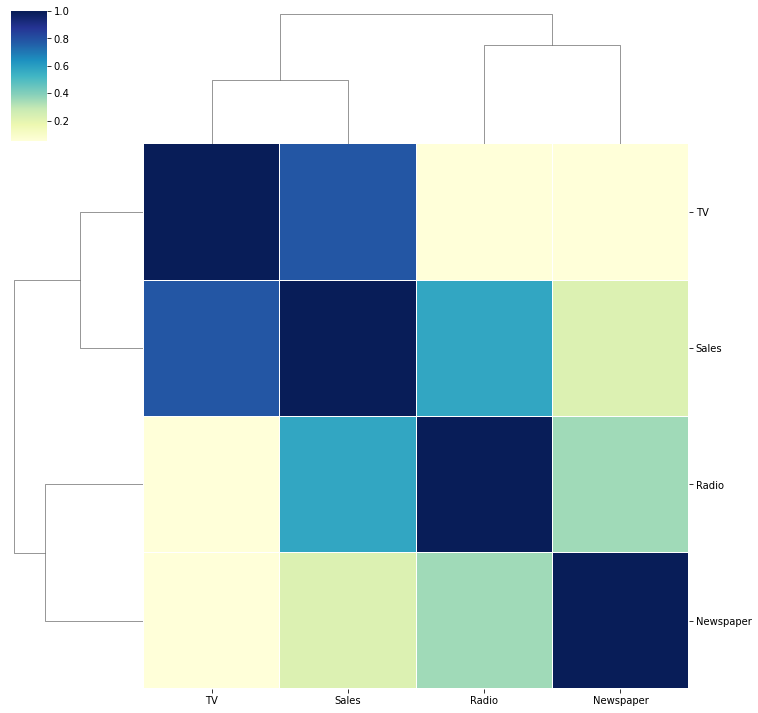

In [23]:
cg = sns.clustermap(corrData, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

## We can check the condition #1 linear relationship and #2 outlier condition via graph

In [24]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

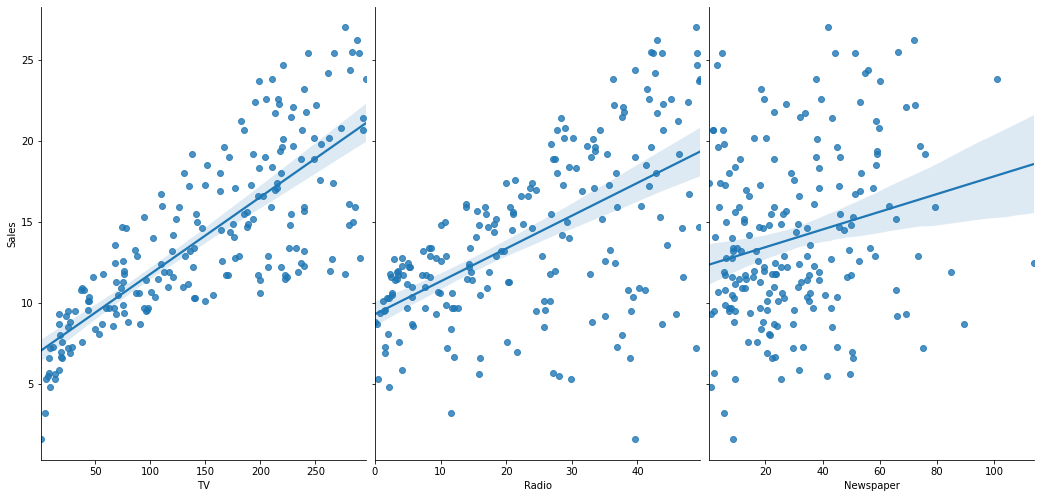

In [26]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg',diag_kind=None)

### Lets check Individual graph

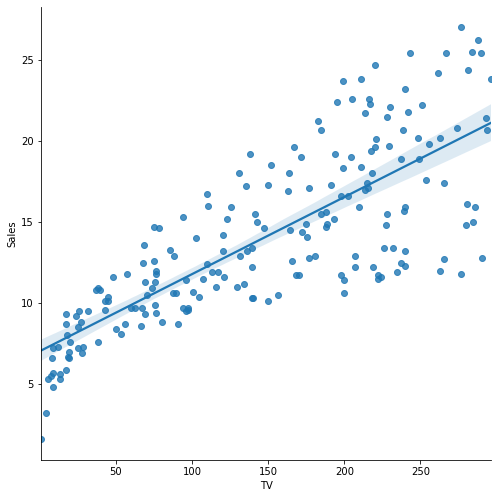

In [28]:
sns.pairplot(data, x_vars=['TV'], y_vars='Sales', height=7, aspect=1, kind='reg',diag_kind=None)

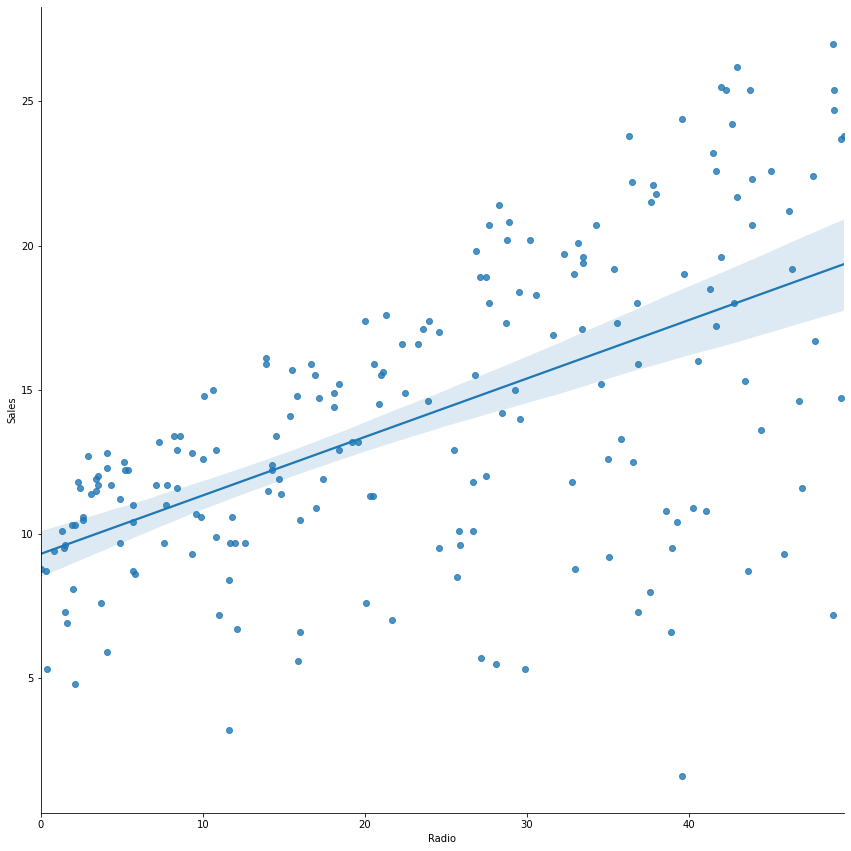

In [31]:
sns.pairplot(data, x_vars=['Radio'], y_vars='Sales', height=12, aspect=1, kind='reg',diag_kind=None)

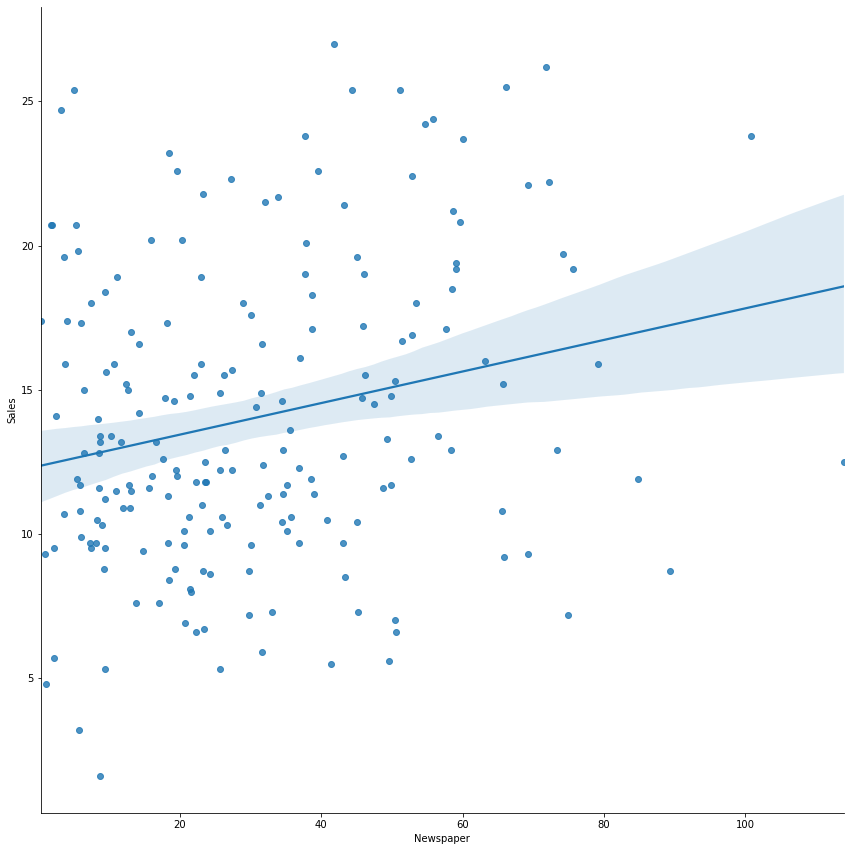

In [32]:
sns.pairplot(data, x_vars=['Newspaper'], y_vars='Sales', height=12, aspect=1, kind='reg',diag_kind=None)

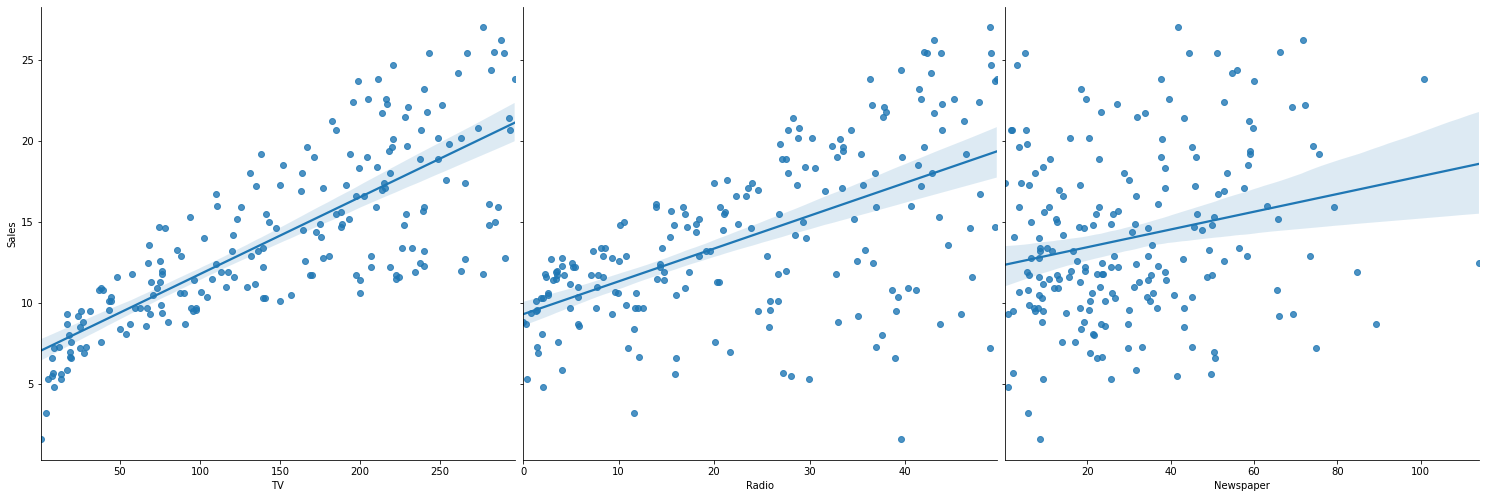

In [34]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=1, kind='reg',diag_kind=None)

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [35]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
X1,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [36]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [37]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

X1
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [38]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Lets check Maulticollinearity 

#### Steps for Implementing VIF

Run a multiple regression.
Calculate the VIF factors.
Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

### How can you detect multicollinearity? 
 1. Bunch Map Analysis: By plotting scatter plots between various Xi’ s we can have a visual description of how the variables are related.

2. Correlation Method: By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.


3.  VIF (Variance Inflation Factor) Method: Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

#### How to check for multicollinearity:

Use scatter plot to visualize correlation effect among variables.
Use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity.
Correlation table

### 1. Bunch Map Analysis:

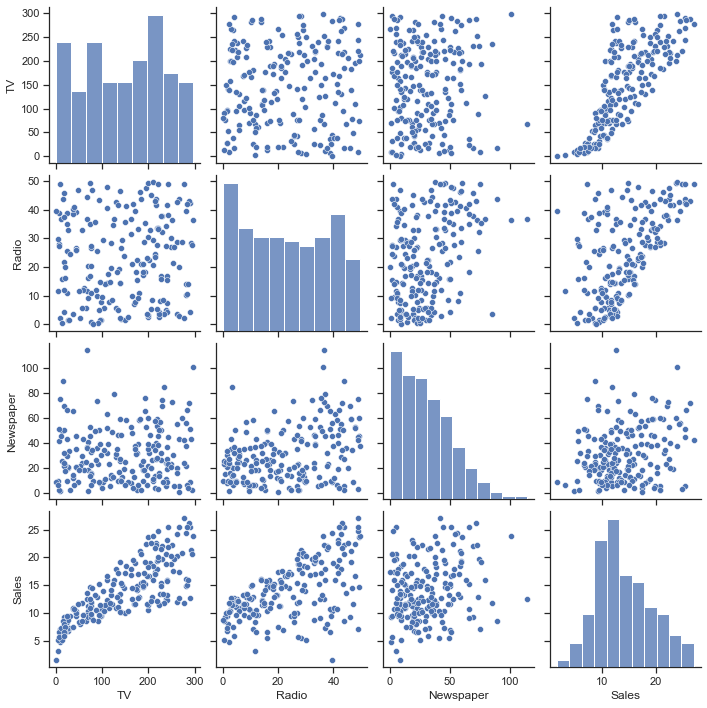

In [41]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

## 2. Correlation Method:

#### We have already applied that in code above

# What is Variance Inflation Factor?

##### Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 )  . Here, we take that particular X as response variable and all other explanatory variables as independent variables. So, we run a regression between one of those explanatory variables with remaining explanatory variables. 

## All the dependent variables and residuals should be uncorrelated.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = X_test
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [44]:
vif

,VIF,Features
0,3.031217,TV
1,3.224055,Radio
2,2.677266,Newspaper


## If the value of Vif is less then 10 , we can safely say that the IV are not correlated.

## Linear regression in scikit-learn

In [45]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [46]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting model coefficients

In [47]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [48]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [49]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [50]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [51]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [52]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [53]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [54]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [55]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_ )

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

SyntaxError: positional argument follows keyword argument (<ipython-input-55-a16a897df517>, line 11)

The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [56]:
# The coefficients
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [0.04656457 0.17915812 0.00345046]


In [57]:
import statsmodels.api as sm

In [58]:
X = data[['TV','Radio']]

In [59]:
X.head()

,TV,Radio
X1,,
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [60]:
y = data['Sales']

In [61]:
y.head()

X1
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [62]:
X =  sm.add_constant(X)

In [63]:
model = sm.OLS(y, X).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        23:19:23   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### How to know if the regression model is the best fit for your data?
The metrics used to determine model fit can have different values based on the type of data. Hence, we need to be extremely careful while interpreting regression analysis.

Following are some metrics you can use to evaluate your regression model:

##### p-Value 
are very important because we can consider a model to be statistically significant only when p-Values are less than the pre-determined statistical significance level, which is ideally 0.05. In Linear Regression, the Null Hypothesis is that the coefficients associated with the variables is equal to zero. The alternate hypothesis is that the coefficients are not equal to zero (i.e. there exists a relationship between the independent variable in question and the dependent variable).
##### t-value: 
Pr(>|t|) or p-value is the probability that you get a t-value as high or higher than the observed value when the Null Hypothesis is true. If the Pr(>|t|) is low, the coefficients are significant (significantly different from zero) and vice versa.
It is important for the model to be statistically significant before we can go ahead and use it to predict the dependent variable, otherwise, the confidence in predicted values from that model reduces and may be construed as an event of chance.

##### R Square (Coefficient of Determination): 
explains the percentage of variance explained by covariates in the model. It tells us the proportion of variation in the dependent (response) variable that has been explained by the model. It ranges between 0 and 1. Usually, higher values are desirable but it rests on the data quality and domain. We don’t necessarily discard a model based on a low R-Squared value. Its a better practice to look at the AIC and prediction accuracy on validation sample when deciding on the efficacy of a model.

##### Adjusted R²: 
penalizes total value for the number of predictors in the model. It doesn’t increase, stays same or decrease unless the newly added variable is truly useful. Therefore, when comparing nested models, it is a good practice to look at Adjusted R² value over R-squared.

##### F Statistics: 

is the ratio of explained variance of the model by unexplained variance. It compares the full model with an intercept to evaluates the overall significance of the model. Its value can range between zero and any arbitrary large number.
AIC and BIC: The Akaike’s information criterion – AIC and the Bayesian information criterion – BIC are measures of the goodness of fit of an estimated statistical model and can also be used for model selection. Both criteria depend on the maximized value of the likelihood function L for the estimated model.
##### Mallow’s Cp: 

is defined as a criterion to assess fits when models with different numbers of parameters are being compared.

##### RMSE / MSE / MAE: are crucial error metric.

##### MSE: is mean squared error. It amplifies the impact of outliers on the model’s accuracy.
##### MAE: is mean absolute error. It is robust against the effect of outliers.
##### RMSE: 
is root mean square error. It is interpreted as how far on an average; the residuals are from zero. It nullifies squared effect of MSE by square root and provides the result in original units as data.
##### MinMax Accuracy:
is defined as mean (min(actual, predicted)/max(actual, predicted)). It tells how far the model’s prediction is off. For a perfect model, this measure is 1.0. The lower the measure, the worse the model, based on out-of-sample performance.